# Experimento 10: _grid search_ e validação com KNN usando FS13

# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [2]:
# Atributos FS13
FS13 = ['kurtosis-A3', 'meanAD-A3',
        'medianAD-A3', 'medianAD-D3',
        'energy-A3', 'energy-D3']


def col_in_fs13(string:str) -> bool:
    for feature in FS13:
        if feature in string:
            return True
    return False


chb_df = pd.read_csv('./chb.csv')

fs13_columns = np.array([col for col in chb_df.columns if col_in_fs13(col)])

groups = chb_df.pop('chb')
y = chb_df.pop('target').values
X = chb_df[fs13_columns].values

In [3]:
results = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            KNeighborsClassifier()),
    param_grid={'kneighborsclassifier__n_neighbors':np.arange(1, 10)},
    cv=GroupKFold(n_splits=24),
    n_jobs=-1
    ).fit(
        X=X,
        y=y,
        groups=groups
        ).cv_results_

results_df = pd.DataFrame(results)
results_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.206460      0.057271         0.832037        0.477519   
1       0.172559      0.043531         0.699238        0.412049   
2       0.150029      0.029619         0.720529        0.426631   
3       0.159404      0.030533         0.737678        0.415566   
4       0.161543      0.034515         0.766518        0.441472   
5       0.159825      0.038252         0.802233        0.484628   
6       0.177153      0.045379         0.804870        0.469306   
7       0.162018      0.028685         0.839940        0.464563   
8       0.161482      0.024341         0.817982        0.526215   

  param_kneighborsclassifier__n_neighbors  \
0                                       1   
1                                       2   
2                                       3   
3                                       4   
4                                       5   
5                                       6   
6                                       7   
7                                       8   
8                                       9   

                                     params  split0_test_score  \
0  {'kneighborsclassifier__n_neighbors': 1}           0.638655   
1  {'kneighborsclassifier__n_neighbors': 2}           0.625000   
2  {'kneighborsclassifier__n_neighbors': 3}           0.669118   
3  {'kneighborsclassifier__n_neighbors': 4}           0.646008   
4  {'kneighborsclassifier__n_neighbors': 5}           0.663866   
5  {'kneighborsclassifier__n_neighbors': 6}           0.651261   
6  {'kneighborsclassifier__n_neighbors': 7}           0.661765   
7  {'kneighborsclassifier__n_neighbors': 8}           0.654412   
8  {'kneighborsclassifier__n_neighbors': 9}           0.670168   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0           0.631868            0.65875           0.712727  ...   
1           0.567033            0.65500           0.761818  ...   
2           0.607692            0.66250           0.696364  ...   
3           0.567033            0.67375           0.738182  ...   
4           0.603297            0.66500           0.716364  ...   
5           0.570330            0.67500           0.763636  ...   
6           0.596703            0.65875           0.721818  ...   
7           0.573626            0.66750           0.752727  ...   
8           0.585714            0.65625           0.721818  ...   

   split17_test_score  split18_test_score  split19_test_score  \
0            0.294643            0.611111            0.489583   
1            0.339286            0.666667            0.484375   
2            0.272321            0.646465            0.479167   
3            0.290179            0.651515            0.489583   
4            0.339286            0.636364            0.479167   
5            0.375000            0.646465            0.500000   
6            0.339286            0.616162            0.468750   
7            0.383929            0.636364            0.489583   
8            0.330357            0.631313            0.479167   

   split20_test_score  split21_test_score  split22_test_score  \
0            0.434524            0.500000            0.500000   
1            0.434524            0.487179            0.485294   
2            0.404762            0.480769            0.463235   
3            0.434524            0.493590            0.448529   
4            0.428571            0.512821            0.463235   
5            0.422619            0.519231            0.463235   
6            0.410714            0.512821            0.455882   
7            0.434524            0.493590            0.455882   
8            0.428571            0.480769            0.433824   

   split23_test_score  mean_test_score  std_test_score  rank_test_score  
0            0.632353         0.588465        0.112625                8  
1            0.617647         0.596012        0.115519                4  
2            0.602941    

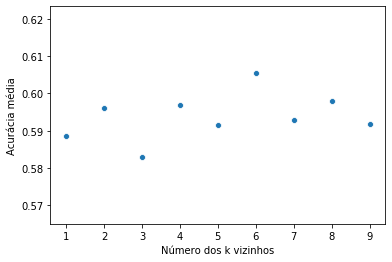

In [4]:
sns.scatterplot(
    data=results_df,
    x='param_kneighborsclassifier__n_neighbors',
    y='mean_test_score'
    ).set(
        xlabel='Número dos k vizinhos',
        ylabel='Acurácia média')

results_df[[
    'param_kneighborsclassifier__n_neighbors',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index()

            fs13
count  24.000000
mean    0.605533
std     0.121822
min     0.375000
25%     0.507353
50%     0.631543
75%     0.689732
max     0.792254


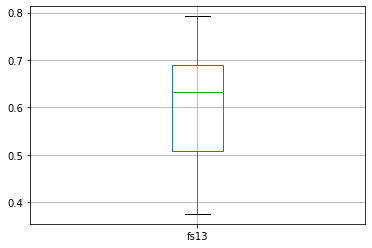

In [6]:
acc_list = []
for train_index, test_index in GroupKFold(n_splits=24).split(X, y, groups):
    # Separando dados
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    acc_list.append(
        make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=6))\
                .fit(X_train, y_train)\
                    .score(X_test, y_test)
    )


knn_df = pd.DataFrame(data=acc_list, columns=['fs13'])
knn_df.to_csv('./03-fs13-knn.csv')

knn_df.boxplot()

print(knn_df.describe())

knn_df.style.hide_index().background_gradient(cmap='Blues')